In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy import stats
import seaborn as sns

# Capital Asset Pricing Model

![timeframe](./assets/time_frame.png)

In [39]:
def get_closing_series(file_name, col_name):
  df = pd.read_csv(f"./data/{file_name}.csv", index_col=0)
  df.index = pd.to_datetime(df.index)
  
  try:
    close_prices = df.loc[:, "Adj Close"]
  except:
    close_prices = df.loc[:, "Price"]

  close_prices.name = col_name
  return close_prices


In [40]:
nifty_50 = get_closing_series("nifty_50", "nifty")
nifty_it = get_closing_series("nifty_it", "nifty")
risk_free = get_closing_series("risk_free_return", "bond_price")

In [41]:
infy = get_closing_series("sp_infy", "stock_price")
tcs = get_closing_series("sp_tcs", "stock_price")
mindtree = get_closing_series("sp_mindtree", "stock_price")

infy_df = pd.concat([infy, nifty_50, risk_free], axis=1)
infy_df = infy_df.dropna()

tcs_df = pd.concat([tcs, nifty_50, risk_free], axis=1)
tcs_df = tcs_df.dropna()

mindtree_df = pd.concat([mindtree, nifty_it, risk_free], axis=1)
mindtree_df = mindtree_df.dropna()

check_na = infy_df.isna().sum()

for df in [infy_df, tcs_df, mindtree_df]:
  check_na = df.isna().sum().sum()
  if check_na:
    print(check_na)


In [42]:
def cagr(final, initial, n):
  return (final/initial)**(1/n) - 1

In [65]:
df["bond_return"] = df["bond_price"].pct_change()
rf = df["bond_return"].sum()
print("rf:", rf)

def calc_expected_return(df, rf):
  df["stock_return"] = df["stock_price"].pct_change()
  df["nifty_return"] = df["nifty"].pct_change()

  count = len(df) - 1
  market_days_pa = 5 * 4 * 12
  n = count / market_days_pa

  market_cagr = cagr(df.iloc[-1]["nifty"], df.iloc[1]["nifty"], n)
  print("Market CAGR:", market_cagr)

  market_return = df["nifty_return"][1:].values
  stock_return = df["stock_return"][1:].values

  (beta, alpha) = stats.linregress(market_return, stock_return)[0:2]
  print("beta:", beta)

  ke = rf + beta * (market_cagr - rf)
  print("ke:", ke)


rf: 0.03241678467869069


In [66]:
def plot_graph(df, stock_name):
  market_return = df["nifty_return"][1:].values
  stock_return = df["stock_return"][1:].values

  sns.regplot(x=market_return, y=stock_return)
  plt.xlabel("Market Returns")
  plt.ylabel(f"{stock_name} Returns")
  plt.title(f"{stock_name} Returns vs Market Returns")

  # plt.xticks(np.arange(min(market_return), max(market_return), 0.05))

  plt.tight_layout()
  plt.show()


## Company: Infosys

Market CAGR: 0.15939357155558675
beta: 0.7507371595404946
ke: 0.12774297698623038


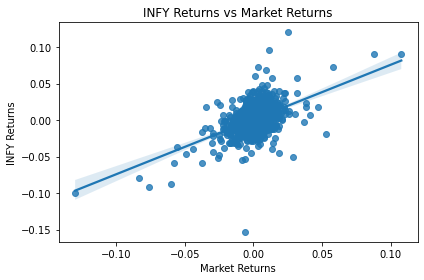

In [67]:
calc_expected_return(infy_df, rf)
plot_graph(infy_df, "INFY")

## Analysis INFY:

Infosys is a defensive stock, as the beta is 0.75, meaning that if Nifty 50 increases by 1%, then INFY increases by 0.75%

The required rate of return is 12.77% per annum which is lower than the market return.

## Company: TCS

Market CAGR: 0.15939357155558675
beta: 0.6292065533116483
ke: 0.1123114111000902


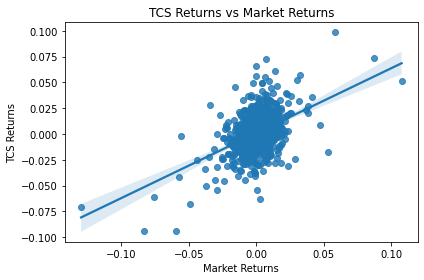

In [68]:
calc_expected_return(tcs_df, rf)
plot_graph(tcs_df, "TCS")


## Analysis TCS:

Infosys is a defensive stock, as the beta is 0.63, meaning that if Nifty 50 increases by 1%, then TCS increases by 0.63%

The required rate of return is 11.23% per annum which is lower than the market return.

## Company: Mindtree

Market CAGR: 0.29845380845641123
beta: 1.0147764002428123
ke: 0.3023848779991574


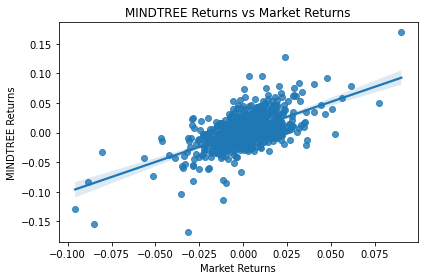

In [69]:
calc_expected_return(mindtree_df, rf)
plot_graph(mindtree_df, "MINDTREE")

## Analysis Mindtree:

Mintree is a slightly risky stock, as the beta is 1.02, meaning that if Nifty IT increases by 1%, then Mindtree increases by 1.02%

The required rate of return is 30.24% per annum which is lower than the market return.